In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t, chi2

%matplotlib inline

# Normal distribution

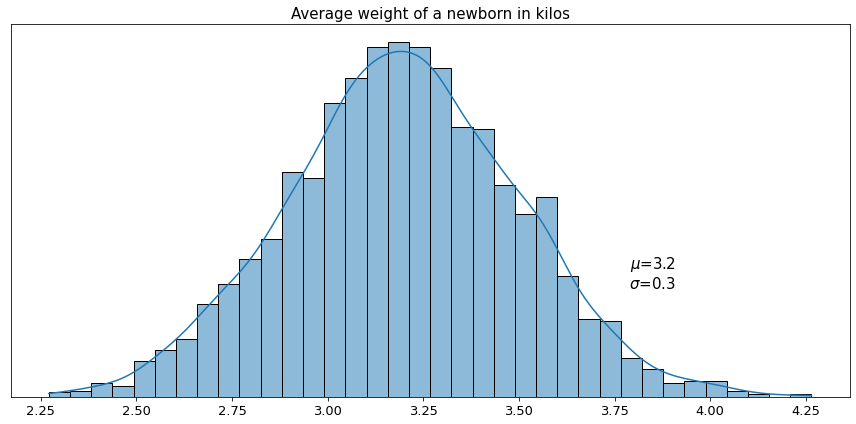

In [65]:
mu = 3.2 
sigma = 0.3
data = norm.rvs(mu, sigma, size=3000, random_state=45)

fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=data, kde=True, palette='deep')
ax.annotate(f'$\mu$={mu}\n$\sigma$={sigma}', xy=(3.85, 80), fontsize=15,
            ha='center', va='center')
ax.set_title('Average weight of a newborn in kilos', fontsize=15)
ax.xaxis.set_tick_params(labelsize=13)
ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('../../assets/images/probability/toy_newborn_weight_distribution.png', bbox_inches='tight');

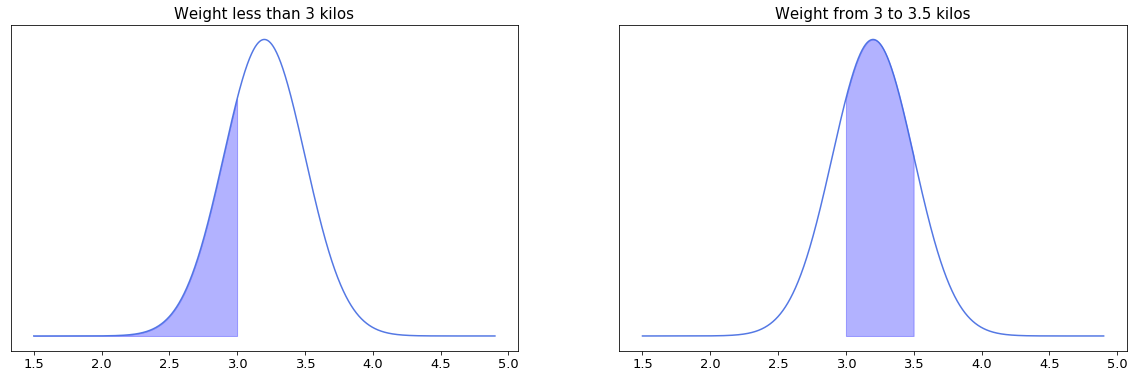

In [4]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
x = np.arange(1.5, 4.9, 0.001)
y = norm.pdf(x, mu, sigma)
ax[0].plot(x, y, color='royalblue', alpha=0.9)
x1 = np.arange(1.5, 3, 0.001)
y1 = norm.pdf(x1, mu, sigma)
ax[0].fill_between(x1, y1, 0, alpha=0.3, color='b')
ax[1].plot(x, y, color='royalblue', alpha=0.9)
x2 = np.arange(3, 3.5, 0.001)
y2 = norm.pdf(x2, mu, sigma)
ax[1].fill_between(x2, y2, 0, alpha=0.3, color='b')
ax[0].set_title('Weight less than 3 kilos', fontsize=15)
ax[1].set_title('Weight from 3 to 3.5 kilos', fontsize=15)
for ax in ax:
    ax.xaxis.set_tick_params(labelsize=13)
    ax.get_yaxis().set_visible(False)
plt.savefig('toy_newborn_weight_distribution_area.png', bbox_inches='tight');

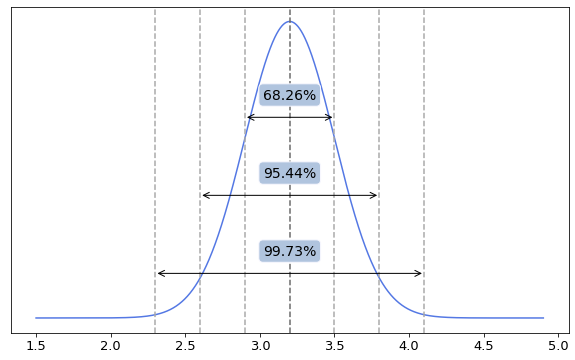

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
x = np.arange(1.5, 4.9, 0.001)
y = norm.pdf(x, mu, sigma)

ax.plot(x, y, color='royalblue', alpha=0.9)

ax.axvline(mu, color='dimgray', linestyle='--') 
ax.axvline(mu+sigma, color='darkgrey', linestyle='--')
ax.axvline(mu+sigma*2, color='darkgrey', linestyle='--')
ax.axvline(mu+sigma*3, color='darkgrey', linestyle='--')
ax.axvline(mu-sigma, color='darkgrey', linestyle='--')
ax.axvline(mu-sigma*2, color='darkgrey', linestyle='--')
ax.axvline(mu-sigma*3, color='darkgrey', linestyle='--')

props = dict(boxstyle="round", fc='lightsteelblue', ec='ghostwhite')

ax.annotate(s='', xy=(mu-sigma, 0.9), xytext=(mu+sigma, 0.9), fontsize=15,
            ha='center', va='center', arrowprops=dict(arrowstyle='<->', )
           )
ax.text(mu, 1, '68.26%', fontsize=14,
        ha='center', va='center', bbox=props)

ax.annotate(s='', xy=(mu-2*sigma, 0.55), xytext=(mu+2*sigma, 0.55), fontsize=15,
            ha='center', va='center', arrowprops=dict(arrowstyle='<->', )
           )
ax.text(mu, 0.65, '95.44%', fontsize=14,
        ha='center', va='center', bbox=props)

ax.annotate(s='', xy=(mu-3*sigma, 0.2), xytext=(mu+3*sigma, 0.2), fontsize=15,
            ha='center', va='center', arrowprops=dict(arrowstyle='<->', )
           )
ax.text(mu, 0.3, '99.73%', fontsize=14,
        ha='center', va='center', bbox=props)

ax.xaxis.set_tick_params(labelsize=13)
ax.get_yaxis().set_visible(False)
plt.savefig('toy_newborn_6_sigma.png', bbox_inches='tight');

# Student's t-distribution

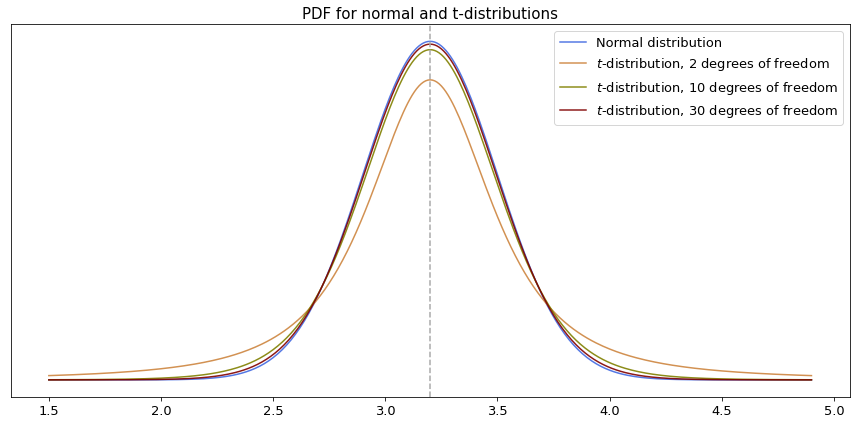

In [49]:
fig, ax = plt.subplots(figsize=(12,6))
mu = 3.2 
sigma = 0.3
x = np.arange(1.5, 4.9, 0.01)

y = norm.pdf(x, loc=mu, scale=sigma)
ax.plot(x, y, color='royalblue', alpha=0.9, label='Normal distribution')
y2 = t.pdf(x, df=2, loc=mu, scale=sigma)
ax.plot(x, y2, color='peru', alpha=0.9, label=r'$t$-distribution, 2 degrees of freedom')
y3 = t.pdf(x, df=10, loc=mu, scale=sigma)
ax.plot(x, y3, color='olive', alpha=0.9, label=r'$t$-distribution, 10 degrees of freedom')
y4 = t.pdf(x, df=30, loc=mu, scale=sigma)
ax.plot(x, y4, color='maroon', alpha=0.9, label=r'$t$-distribution, 30 degrees of freedom')
ax.axvline(mu, color='darkgrey', linestyle='--')
ax.set_title('PDF for normal and t-distributions', fontsize=15)
ax.xaxis.set_tick_params(labelsize=13)
ax.get_yaxis().set_visible(False)
plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig('../../assets/images/probability/normal_and_t_distributions.png', bbox_inches='tight');

# Chi-square distribution

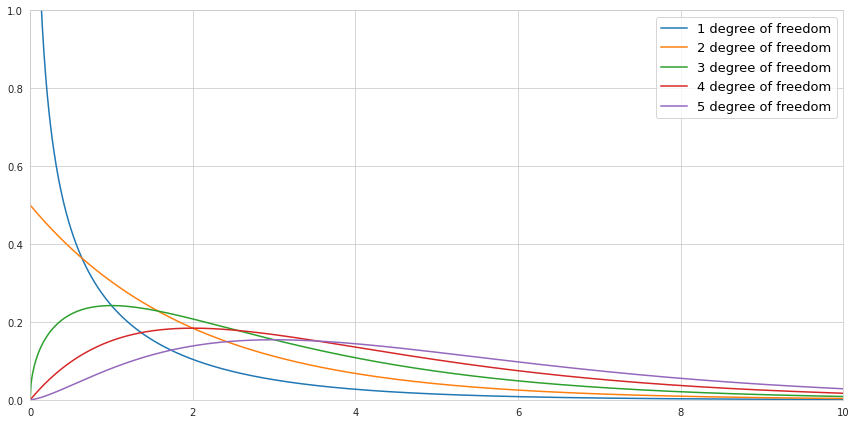

In [39]:
x = np.arange(0, 10, 0.01)

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(12,6))
ax.set_ylim(0, 1)
ax.set_xlim(0, 10)

for df in range(1, 6):
    y = chi2.pdf(x, df=df, loc=0, scale=1)
    plt.plot(x, y, label = f'{df} degree of freedom')

plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig('../../assets/images/probability/chi_squared_distributions.png', bbox_inches='tight');

# Binomial distribution

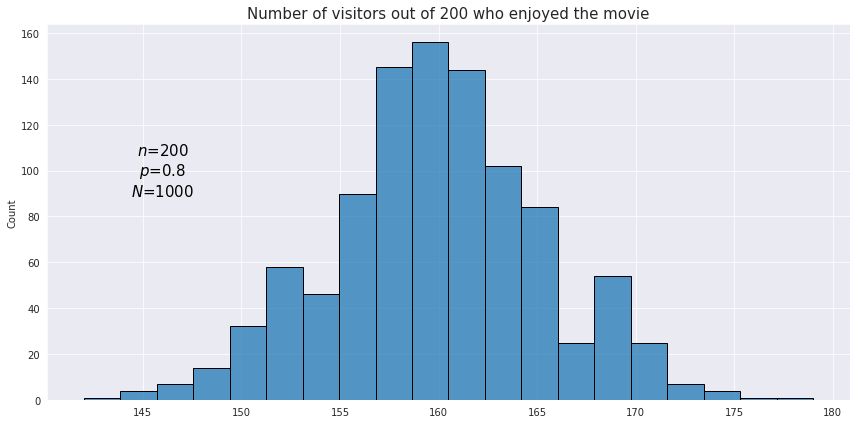

In [165]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(12,6))

n = 200
p = 0.8
size = 1000
binomial = np.random.binomial(n, p, size)
sns.histplot(data=binomial, palette='deep', bins=20)
ax.set_title('Number of visitors out of 200 who enjoyed the movie', fontsize=15)
ax.annotate(f'$n$={n}\n$p$={p}\n$N$={size}', xy=(146, 100), fontsize=15,
            ha='center', va='center')
plt.tight_layout()
plt.savefig('../../assets/images/probability/binomial_distribution.png', bbox_inches='tight');

# Uniform distribution

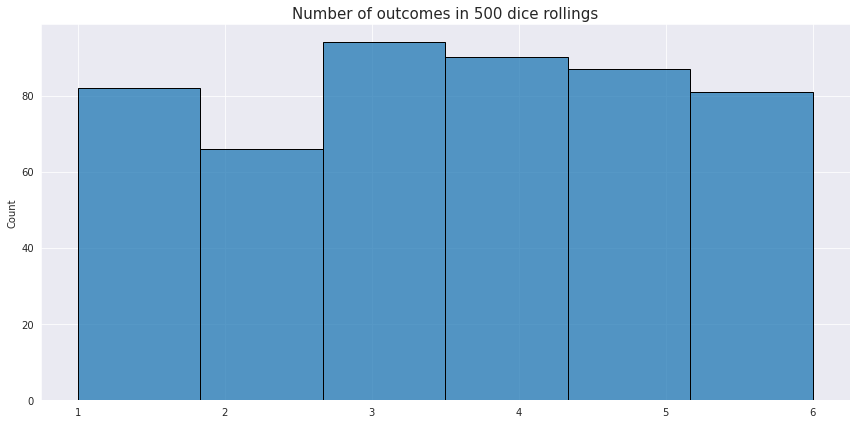

In [160]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(12,6))
uniform_discrete = np.random.randint(low=1, high=7, size=500)
sns.histplot(data=uniform_discrete, palette='deep', bins=6)
ax.set_title('Number of outcomes in 500 dice rollings', fontsize=15)
plt.tight_layout()
plt.savefig('../../assets/images/probability/uniform_distribution.png', bbox_inches='tight');

# Geometric distribution

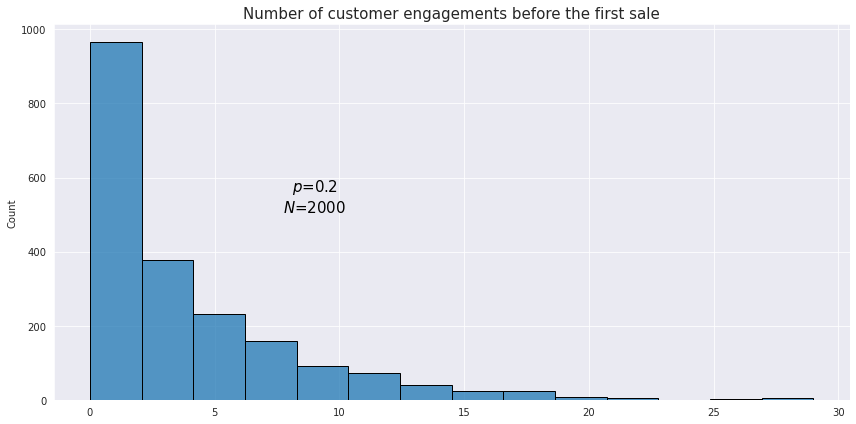

In [225]:
geometric = []
failure = 0
n = 0
p = 0.2

while n < 2000:
    result = np.random.choice(['success', 'failure'], p=(p, 1-p))
    if result == 'failure':
        failure += 1
    else:
        geometric.append(failure)
        failure = 0
        n += 1
        
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=geometric, palette='deep', bins=14)
ax.annotate(f'$p$={p}\n$N$={n}', xy=(9, 550), fontsize=15,
            ha='center', va='center')
ax.set_title('Number of customer engagements before the first sale', fontsize=15)
plt.tight_layout()
plt.savefig('../../assets/images/probability/geometric_distribution.png', bbox_inches='tight');

# Poisson distribution

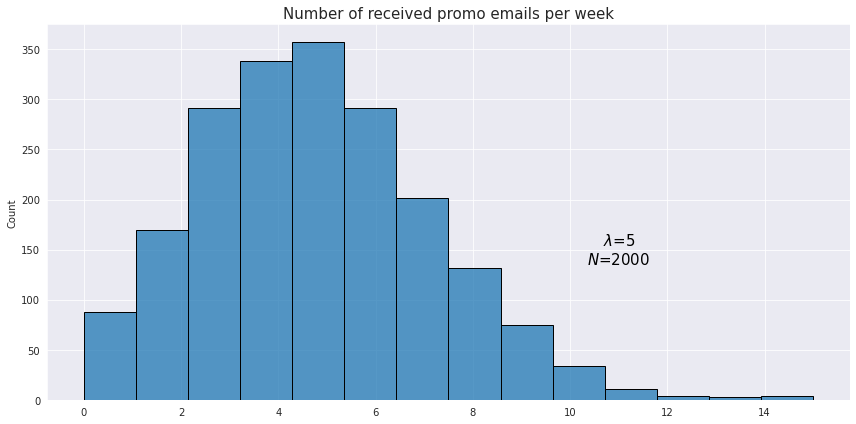

In [217]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(12,6))
poisson = np.random.poisson(lam=5, size=2000)
sns.histplot(data=poisson, palette='deep', bins=14)
ax.annotate('$\lambda$=5\n$N$=2000', xy=(11, 150), fontsize=15,
            ha='center', va='center')
ax.set_title('Number of received promo emails per week', fontsize=15)
plt.tight_layout()
plt.savefig('../../assets/images/probability/poisson_distribution.png', bbox_inches='tight');